In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [8]:
iris_data = pd.read_csv('/content/Iris Dataset.csv')


In [10]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


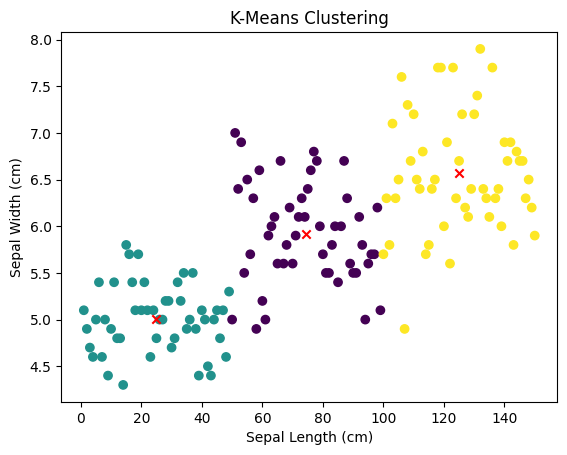

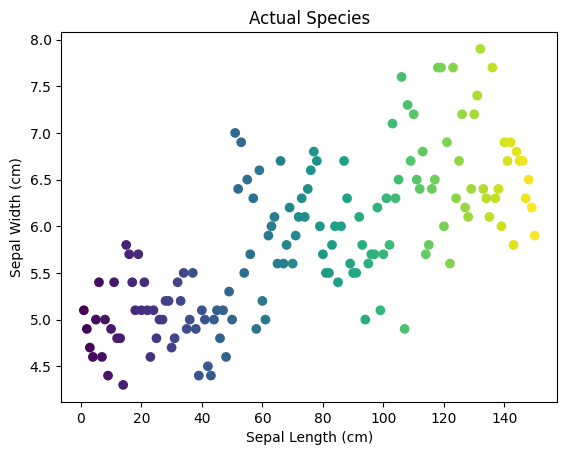

In [11]:
def k_means_clustering(dataset, k, max_iterations=100):
    # Randomly initialize cluster centroids
    np.random.seed(42)
    centroids = dataset[np.random.choice(dataset.shape[0], k, replace=False)]
    
    # Store the previous centroids to check for convergence
    prev_centroids = np.zeros_like(centroids)
    
    # Initialize cluster assignments and distances
    cluster_assignments = np.zeros(dataset.shape[0], dtype=int)
    distances = np.zeros((dataset.shape[0], k))
    
    for iteration in range(max_iterations):
        # Calculate distances between each data point and centroids
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(dataset - centroid, axis=1)
        
        # Assign data points to the closest centroid
        cluster_assignments = np.argmin(distances, axis=1)
        
        # Update centroids
        for i in range(k):
            centroids[i] = np.mean(dataset[cluster_assignments == i], axis=0)
        
        # Check for convergence
        if np.allclose(prev_centroids, centroids):
            break
        
        prev_centroids = centroids.copy()
    
    return cluster_assignments, centroids

# Load the Iris dataset
iris_data = pd.read_csv('/content/Iris Dataset.csv')
iris_data = iris_data.drop('Species', axis=1)  # Remove the 'Species' column

# Convert the dataset to a NumPy array
dataset = iris_data.values

# Perform K-Means Clustering with k=3
cluster_assignments, centroids = k_means_clustering(dataset, k=3)

# Plotting the output of the clustering
plt.scatter(dataset[:, 0], dataset[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering')
plt.show()

# Plotting the actual species
actual_species = iris_data.index
plt.scatter(dataset[:, 0], dataset[:, 1], c=actual_species, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Actual Species')
plt.show()


Eigenvalues: [1.89078098e+03 9.73286632e-01 2.22994729e-01 6.92908368e-02
 2.27360616e-02]


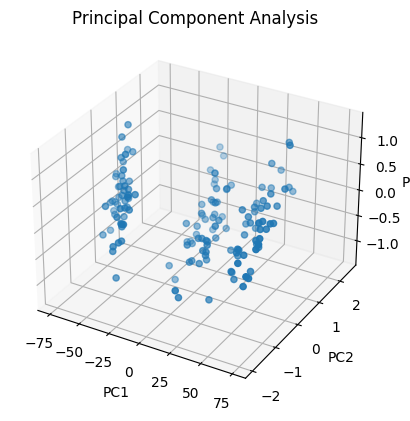

In [12]:


def pca(dataset):
    # Center the dataset
    centered_data = dataset - np.mean(dataset, axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)
    
    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Project the data onto the principal components
    projected_data = np.dot(centered_data, eigenvectors)
    
    return projected_data, eigenvalues, eigenvectors

# Load the Iris dataset
iris_data = pd.read_csv('/content/Iris Dataset.csv')
iris_data = iris_data.drop('Species', axis=1)

# Convert the dataset to a NumPy array
dataset = iris_data.values

# Perform PCA
projected_data, eigenvalues, eigenvectors = pca(dataset)

# Plotting the first three eigenvectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Principal Component Analysis')

# Display eigenvalues
print("Eigenvalues:", eigenvalues)

plt.show()
